 Question 1

Explain the differences between AI, ML, Deep Learning (DL), and Data
Science (DS)

Answer:

AI (Artificial Intelligence): Broad field of making machines simulate human intelligence (decision-making, reasoning, problem-solving).

ML (Machine Learning): A subset of AI where machines learn from data instead of being explicitly programmed.

DL (Deep Learning): A subset of ML that uses neural networks with many layers to handle complex tasks like image, speech, and Natural Language Processing.

DS (Data Science): Field focused on extracting insights from data using statistics, ML, visualization, and domain knowledge.

Question 2:

 What are the types of machine learning? Describe each with one
real-world example.

Answer:

Supervised Learning

Definition: Model learns from labeled data (input → output is known).

Goal: Predict outcomes for new, unseen data.

Example: Predicting house prices based on features like size, location, and number of rooms.

Unsupervised Learning

Definition: Model learns from unlabeled data by finding patterns or structure.

Goal: Group, cluster, or reduce dimensions of data.

Example: Customer segmentation in e-commerce (grouping customers by purchasing behavior).

Reinforcement Learning

Definition: Agent learns by interacting with an environment and receiving rewards or penalties.

Goal: Maximize long-term reward by trial and error.

Example: Training a self-driving car to stay in lane by rewarding safe driving actions.

Question 3:

Define overfitting, underfitting, and the bias-variance tradeoff in machine
learning.

Answer:

Overfitting: Model learns too much detail/noise from training data → performs well on training but poorly on new data.

Example: A student memorizing past exam answers instead of learning concepts.

Underfitting: Model is too simple to capture the underlying patterns → performs poorly on both training and test data.

Example: A student not studying enough, so they fail both practice and real exams.

Bias-Variance Tradeoff:

Bias: Error from oversimplifying the model (causes underfitting).

Variance: Error from model being too sensitive to training data (causes overfitting).

Tradeoff: Goal is to find a balance—low enough bias to learn patterns, but low enough variance to generalize well.


Question 4:

 What are outliers in a dataset, and list three common techniques for
handling them

Answer:

Outliers are data points that are significantly different from the majority of the dataset and may distort analysis or model performance.

3 common techniques to handle outliers:

Removal: Delete extreme values if they are errors or irrelevant (e.g., negative age).

Transformation: Apply log, square root, or normalization to reduce their impact.

Imputation/Capping: Replace with mean/median, or cap them using methods like IQR (Interquartile Range) or Winsorization.

Question 5:

 Explain the process of handling missing values and mention one
imputation technique for numerical and one for categorical data.

Answer:

Handling Missing Values – Process:

Detect: Identify missing values (NaN, blanks, etc.).

Analyze: Check % of missing data and whether it’s random or systematic.

Decide: Drop rows/columns (if too many missing) or impute values.

Imputation techniques:

Numerical data: Replace with mean/median (e.g., filling missing ages with median age).

Categorical data: Replace with mode (most frequent value) (e.g., filling missing gender with the most common category).



In [1]:
'''
Question 6: Write a Python program that:
● Creates a synthetic imbalanced dataset with make_classification() from
sklearn.datasets.
● Prints the class distribution.
'''

from sklearn.datasets import make_classification
import numpy as np
from collections import Counter

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], random_state=42)

print("Class distribution:", Counter(y))


Class distribution: Counter({np.int64(0): 895, np.int64(1): 105})


In [2]:
'''
Question 7: Implement one-hot encoding using pandas for the following list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.
'''

import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

df = pd.DataFrame(colors, columns=['Color'])

one_hot = pd.get_dummies(df, columns=['Color'])

print(one_hot)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


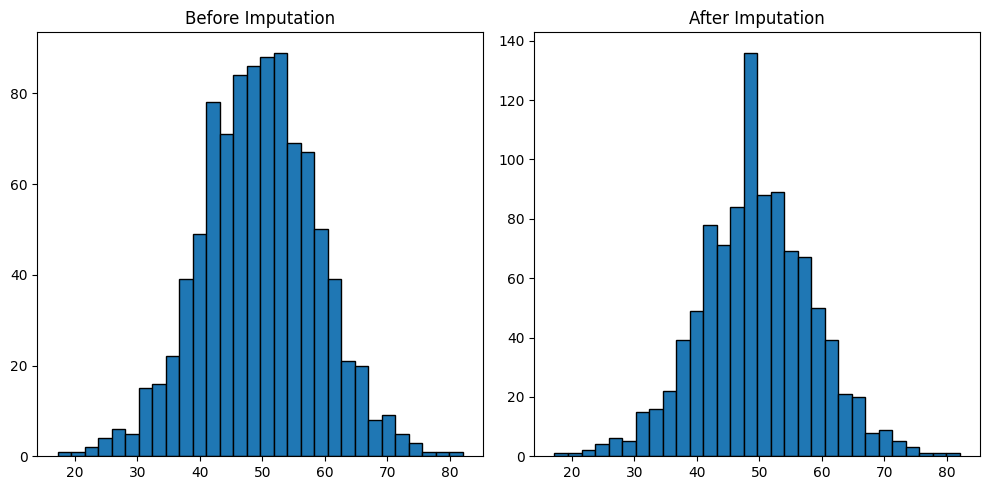

In [3]:
'''
Question 8: Write a Python script to:
● Generate 1000 samples from a normal distribution.
● Introduce 50 random missing values.
● Fill missing values with the column mean.
● Plot a histogram before and after imputation
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.random.normal(loc=50, scale=10, size=1000)

data[np.random.choice(1000, 50, replace=False)] = np.nan

df = pd.DataFrame(data, columns=['Values'])

mean_value = df['Values'].mean()
df_filled = df.fillna(mean_value)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(df['Values'].dropna(), bins=30, edgecolor='black')
plt.title("Before Imputation")

plt.subplot(1, 2, 2)
plt.hist(df_filled['Values'], bins=30, edgecolor='black')
plt.title("After Imputation")

plt.tight_layout()
plt.show()


In [4]:
'''
Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.
'''

from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print("Scaled Data:\n", scaled_data)


Scaled Data:
 [[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


In [6]:
'''
Question 10: You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:
● Missing ages,
● Outliers in transaction amount,
● A highly imbalanced target (fraud vs. non-fraud),
● Categorical variables like payment method.
Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.
'''

'''
Answer:

Handle Missing Data (Ages):

If the percentage of missing ages is small → remove those rows.

If missing values are significant → impute using:

Mean/median (for numerical ages).

Predictive model (e.g., regression or KNN imputer) if age correlates with other features.

Treat Outliers (Transaction Amounts):

Detect outliers using IQR (Interquartile Range), Z-score, or boxplots.

Options to handle:

Cap values at an upper/lower threshold (winsorization).

Apply transformations (e.g., log scaling).

Remove extreme cases if they are clear anomalies.

Address Target Imbalance (Fraud vs. Non-Fraud)

Use resampling techniques:

Oversampling minority class (SMOTE).

Undersampling majority class.

Or algorithm-level methods:

Use class weights in models like Logistic Regression, Random Forest, or XGBoost.

Encode Categorical Variables (Payment Method, etc.)

For nominal (unordered) categories → One-Hot Encoding.

For ordinal (ordered) categories → Label Encoding or custom mapping.

Consider frequency encoding if too many categories exist.

Feature Scaling (if required by model)

Apply StandardScaler or MinMaxScaler for distance-based models (e.g., KNN, SVM).

Final Preparation

Split into train/test sets.

Perform feature selection if needed.

Ensure pipeline is consistent to avoid data leakage.
'''

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

df = pd.read_csv("transactions.csv")

imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])

Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['TransactionAmount'] = np.where(df['TransactionAmount'] > upper, upper,
                                   np.where(df['TransactionAmount'] < lower, lower, df['TransactionAmount']))

categorical_cols = ['PaymentMethod']
numeric_cols = ['Age', 'TransactionAmount']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X = df.drop('Fraud', axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train_res, y_train_res)

print("Model trained and ready!")


FileNotFoundError: [Errno 2] No such file or directory: 'transactions.csv'